# Project - Data Cleaning

## Introduction
In this lab, we'll make use of everything we've learned about pandas, data cleaning, and exploratory data analysis. In order to complete this lab, you'll have to import, clean, combine, reshape, and visualize data to answer questions provided, as well as your own questions!

## Objectives
You will be able to:
- Use different types of joins to merge DataFrames 
- Identify missing values in a dataframe using built-in methods 
- Evaluate and execute the best strategy for dealing with missing, duplicate, and erroneous values for a given dataset 
- Inspect data for duplicates or extraneous values and remove them 


## The dataset
In this lab, we'll work with the comprehensive [Super Heroes Dataset](https://www.kaggle.com/claudiodavi/superhero-set/data), which can be found on Kaggle!


## Getting Started

In the cell below:

* Import and alias pandas as `pd`
* Import and alias numpy as `np`
* Import and alias seaborn as `sns`
* Import and alias matplotlib.pyplot as `plt`
* Set matplotlib visualizations to display inline in the notebook

In [112]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

For this lab, our dataset is split among two different sources -- `'heroes_information.csv'` and `'super_hero_powers.csv'`.

Use pandas to read in each file and store them in DataFrames in the appropriate variables below. Then, display the `.head()` of each to ensure that everything loaded correctly.  

In [113]:
heroes_df = pd.read_csv('heroes_information.csv')
powers_df = pd.read_csv('super_hero_powers.csv')

In [114]:
heroes_df.head()

,Unnamed: 0,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


In [115]:
powers_df.head()

,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,3-D Man,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Abe Sapien,True,True,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Abin Sur,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Abomination,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


It looks as if the heroes information dataset contained an index column.  We did not specify that this dataset contained an index column, because we hadn't seen it yet. Pandas does not know how to tell apart an index column from any other data, so it stored it with the column name `Unnamed: 0`.  

Our DataFrame provided row indices by default, so this column is not needed.  Drop it from the DataFrame in place in the cell below, and then display the head of `heroes_df` to ensure that it worked properly. 

In [116]:
heroes_df.columns

Index(['Unnamed: 0', 'name', 'Gender', 'Eye color', 'Race', 'Hair color',
       'Height', 'Publisher', 'Skin color', 'Alignment', 'Weight'],
      dtype='object')

In [117]:
heroes_df = heroes_df.drop(columns = 'Unnamed: 0')
heroes_df.head()

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


## Familiarize yourself with the dataset

The first step in our Exploratory Data Analysis will be to get familiar with the data.  This step includes:

* Understanding the dimensionality of your dataset
* Investigating what type of data it contains, and the data types used to store it
* Discovering how missing values are encoded, and how many there are
* Getting a feel for what information it does and doesn't contain

In the cell below, get the descriptive statistics of each DataFrame.  

In [118]:
heroes_df.describe()

,Height,Weight
count,734.000000,732.000000
mean,102.254087,43.855191
std,139.624543,130.823733
min,-99.000000,-99.000000
25%,-99.000000,-99.000000
50%,175.000000,62.000000
75%,185.000000,90.000000
max,975.000000,900.000000


In [119]:
powers_df.describe()

,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
count,667,667,667,667,667,667,667,667,667,667,...,667,667,667,667,667,667,667,667,667,667
unique,667,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
top,Lobo,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
freq,1,425,489,656,642,620,410,541,590,455,...,653,651,665,658,666,666,666,665,665,665


In [120]:
print('Dimensionality of heroes_df: \n' + str(heroes_df.shape))
print('\n Investigation of the data: \n' + str(heroes_df.info()))
print('\n How missing values are encoded and how many there are: \n' + str(heroes_df.isna().sum()) +'\n\n')
print('\n Dimentionality of powers_df: \n'+str(powers_df.shape))
print('\n Investigation of the data: \n'+str(powers_df.info()))
print('\n How missing values are encoded and how many there are: \n' + str(powers_df.isna().sum()))

Dimensionality of heroes_df: 
(734, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 734 entries, 0 to 733
Data columns (total 10 columns):
name          734 non-null object
Gender        734 non-null object
Eye color     734 non-null object
Race          734 non-null object
Hair color    734 non-null object
Height        734 non-null float64
Publisher     719 non-null object
Skin color    734 non-null object
Alignment     734 non-null object
Weight        732 non-null float64
dtypes: float64(2), object(8)
memory usage: 57.5+ KB

 Investigation of the data: 
None

 How missing values are encoded and how many there are: 
name           0
Gender         0
Eye color      0
Race           0
Hair color     0
Height         0
Publisher     15
Skin color     0
Alignment      0
Weight         2
dtype: int64



 Dimentionality of powers_df: 
(667, 168)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Columns: 168 entries, hero_names to Omniscient
dtypes: bool(167), o

## Dealing with missing values

Starting in the cell below, detect and deal with any missing values in either DataFrame. Then, explain your methodology for detecting and dealing with outliers in the markdown section below. Be sure to explain your strategy for dealing with missing values in numeric columns, as well as your strategy for dealing with missing values in non-numeric columns.  

Note that if you need to add more cells to write code in, you can do this by:

**1.** Highlighting a cell and then pressing `ESC` to enter command mode.  
**2.** Press `A` to add a cell above the highlighted cell, or `B` to add a cell below the highlighted cell. 

Describe your strategy below this line:
____________________________________________________________________________________________________________________________




In [121]:
for column in list(heroes_df.columns):
    print(heroes_df[column].value_counts())
    print('\n')

Goliath           3
Spider-Man        3
Batgirl           2
Firestorm         2
Captain Marvel    2
                 ..
Micro Lad         1
Cheetah           1
Chamber           1
Deadshot          1
Lizard            1
Name: name, Length: 715, dtype: int64


Male      505
Female    200
-          29
Name: Gender, dtype: int64


blue                       225
-                          172
brown                      126
green                       73
red                         46
black                       23
yellow                      19
white                       17
grey                         6
hazel                        6
purple                       4
gold                         3
yellow (without irises)      2
violet                       2
amber                        2
yellow / red                 1
silver                       1
indigo                       1
green / blue                 1
yellow / blue                1
white / red                  1
bown              

In [122]:
heroes_df = heroes_df.drop(columns=['Race', 'Hair color', 'Height', 'Skin color', 'Weight','Eye color'])

In [123]:
heroes_df.columns

Index(['name', 'Gender', 'Publisher', 'Alignment'], dtype='object')

In [124]:
heroes_df.Alignment = heroes_df.Alignment.replace('-','neutral')

In [125]:
heroes_df.Publisher.isna().sum()

15

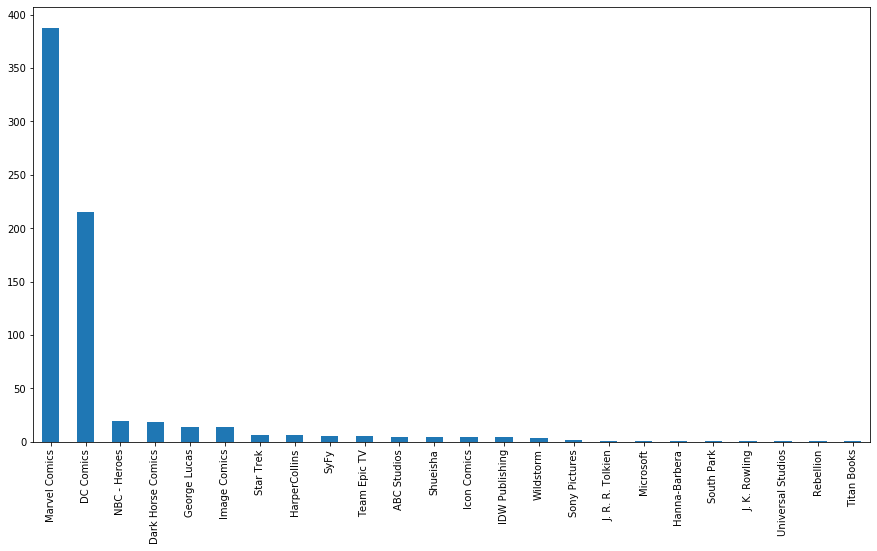

In [126]:
heroes_df.Publisher.value_counts().plot(kind='bar', figsize=(15,8))

In [127]:
heroes_df.Publisher=heroes_df.Publisher.fillna('Annonymous')
# Since I want to keep the values for publisher, I will keep the NaN value as a annonymous.
# There are two major players in the Publisher 'Marvel Comics and DC Comics'

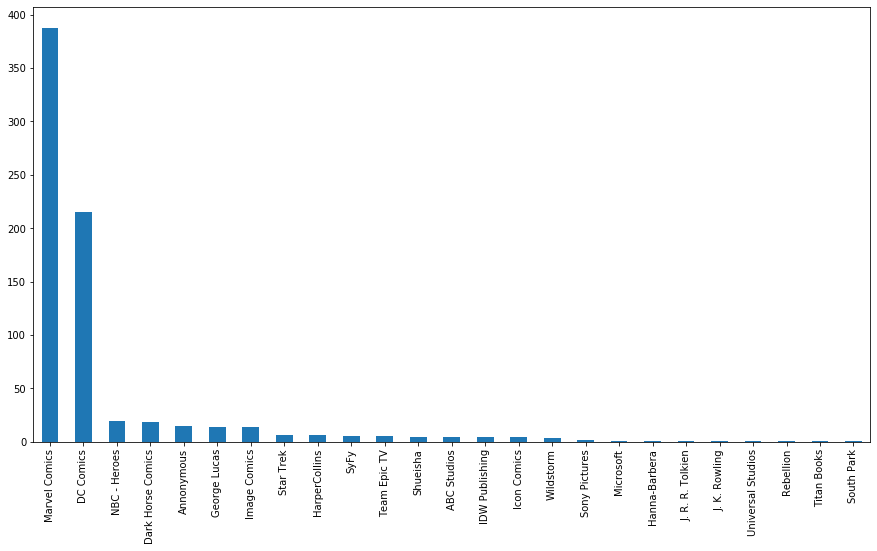

In [128]:
heroes_df.Publisher.value_counts().plot(kind='bar',figsize=(15,8))

In [129]:
heroes_df.Gender = heroes_df.Gender.replace('-',np.NaN)

In [130]:
heroes_df= heroes_df.dropna()

In [131]:
heroes_df.isna().sum()

name         0
Gender       0
Publisher    0
Alignment    0
dtype: int64

In [132]:
heroes_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 705 entries, 0 to 733
Data columns (total 4 columns):
name         705 non-null object
Gender       705 non-null object
Publisher    705 non-null object
Alignment    705 non-null object
dtypes: object(4)
memory usage: 27.5+ KB


## Joining, Grouping, and Aggregating

In the cell below, join the two DataFrames.  Think about which sort of join you should use, as well as which columns you should join on.  Rename columns and manipulate as needed.  

**_HINT:_** Consider the possibility that the columns you choose to join on contain duplicate entries. If that is the case, devise a strategy to deal with the duplicates.

**_HINT:_** If the join throws an error message, consider setting the column you want to join on as the index for each DataFrame.  

In [133]:
heroes_df.columns

Index(['name', 'Gender', 'Publisher', 'Alignment'], dtype='object')

In [134]:
powers_df.columns

Index(['hero_names', 'Agility', 'Accelerated Healing', 'Lantern Power Ring',
       'Dimensional Awareness', 'Cold Resistance', 'Durability', 'Stealth',
       'Energy Absorption', 'Flight',
       ...
       'Web Creation', 'Reality Warping', 'Odin Force', 'Symbiote Costume',
       'Speed Force', 'Phoenix Force', 'Molecular Dissipation',
       'Vision - Cryo', 'Omnipresent', 'Omniscient'],
      dtype='object', length=168)

In [135]:
heroes_df = heroes_df.rename(columns={'name':'hero_names'})

In [136]:
heroes_df.columns

Index(['hero_names', 'Gender', 'Publisher', 'Alignment'], dtype='object')

In [137]:
heroes_df.duplicated().sum()

12

In [138]:
duplicated_heroes_df = heroes_df[heroes_df.duplicated()]

In [139]:
duplicated_heroes_df

,hero_names,Gender,Publisher,Alignment
50,Atom,Male,DC Comics,good
63,Batgirl,Female,DC Comics,good
69,Batman,Male,DC Comics,good
97,Black Canary,Female,DC Comics,good
116,Blizzard,Male,Marvel Comics,bad
123,Blue Beetle,Male,DC Comics,good
260,Firestorm,Male,DC Comics,good
290,Goliath,Male,Marvel Comics,good
291,Goliath,Male,Marvel Comics,good
482,Namor,Male,Marvel Comics,good


In [140]:
heroes_df.drop_duplicates(subset='hero_names', inplace = True)

In [141]:
heroes_df.duplicated().sum()

0

In [142]:
powers_df.duplicated().sum()

0

In [143]:
heroes_df

,hero_names,Gender,Publisher,Alignment
0,A-Bomb,Male,Marvel Comics,good
1,Abe Sapien,Male,Dark Horse Comics,good
2,Abin Sur,Male,DC Comics,good
3,Abomination,Male,Marvel Comics,bad
4,Abraxas,Male,Marvel Comics,bad
...,...,...,...,...
729,Yellowjacket II,Female,Marvel Comics,good
730,Ymir,Male,Marvel Comics,good
731,Yoda,Male,George Lucas,good
732,Zatanna,Female,DC Comics,good


In [144]:
print(powers_df.isna().sum())
powers_df.hero_names.value_counts()

hero_names               0
Agility                  0
Accelerated Healing      0
Lantern Power Ring       0
Dimensional Awareness    0
                        ..
Phoenix Force            0
Molecular Dissipation    0
Vision - Cryo            0
Omnipresent              0
Omniscient               0
Length: 168, dtype: int64


Lobo          1
Faora         1
Birdman       1
Wolverine     1
Electro       1
             ..
Quill         1
Doc Samson    1
Heat Wave     1
Hyperion      1
Lizard        1
Name: hero_names, Length: 667, dtype: int64

In [145]:
powers_df = powers_df.astype('str')

In [146]:
combined_df = heroes_df.set_index('hero_names').join(powers_df.set_index('hero_names'), how='inner')
combined_df.head()

,Gender,Publisher,Alignment,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
hero_names,,,,,,,,,,,,,,,,,,,,,
A-Bomb,Male,Marvel Comics,good,False,True,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
Abe Sapien,Male,Dark Horse Comics,good,True,True,False,False,True,True,False,...,False,False,False,False,False,False,False,False,False,False
Abin Sur,Male,DC Comics,good,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Abomination,Male,Marvel Comics,bad,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Abraxas,Male,Marvel Comics,bad,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In the cell below, subset male and female heroes into different dataframes.  Create a scatterplot of the height and weight of each hero, with weight as the y-axis.  Plot both the male and female heroes subset into each dataframe, and make the color for each point in the scatterplot correspond to the gender of the superhero.

## Some Initial Investigation

Next, slice the DataFrame as needed and visualize the distribution of heights and weights by gender.  You should have 4 total plots.  

In the cell below:

* Slice the DataFrame into separate DataFrames by gender
* Complete the `show_distplot()` function.  This helper function should take in a DataFrame, a string containing the gender we want to visualize, and the column name we want to visualize by gender. The function should display a distplot visualization from seaborn of the column/gender combination.  

Hint: Don't forget to check the [seaborn documentation for distplot](https://seaborn.pydata.org/generated/seaborn.distplot.html) if you have questions about how to use it correctly! 

In [147]:
new_heroes_df = pd.read_csv('heroes_information.csv')
mean_weight = new_heroes_df.Weight.mean()
new_heroes_df.Weight.fillna(mean_weight, inplace=True)

In [148]:
male_heroes_df = new_heroes_df[new_heroes_df.Gender=='Male']
female_heroes_df = new_heroes_df[new_heroes_df.Gender == 'Female']


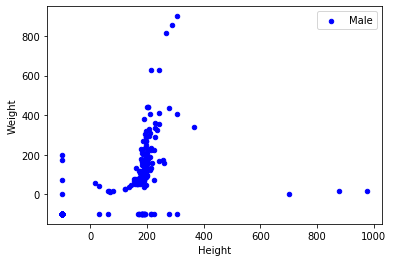

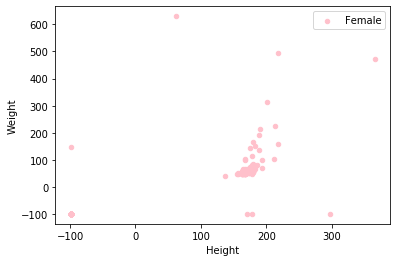

In [149]:
male_heroes_df.plot.scatter(x='Height',y='Weight', c='blue', label='Male')
female_heroes_df.plot.scatter(x='Height',y='Weight', c='pink', label='Female')

In [150]:
def show_distplot(dataframe, gender, column_name):
    print('Mean {} of {} heroes: {}'.format(column_name,gender,dataframe[column_name].mean()))
    print('Median {} of {} heroes: {}'.format(column_name,gender,dataframe[column_name].median()))
    print('Mode {} of {} heroes: {}'.format(column_name,gender,dataframe[column_name].mode()))
    dataframe[column_name].plot(kind='hist', figsize=(15,8))
    plt.title('Distribution of {} for {} Heroes'.format(column_name,gender))
    plt.xlabel(column_name)
    plt.ylabel('Density')
    plt.show()


Mean Height of Male heroes: 107.27524752475247
Median Height of Male heroes: 180.0
Mode Height of Male heroes: 0   -99.0
dtype: float64


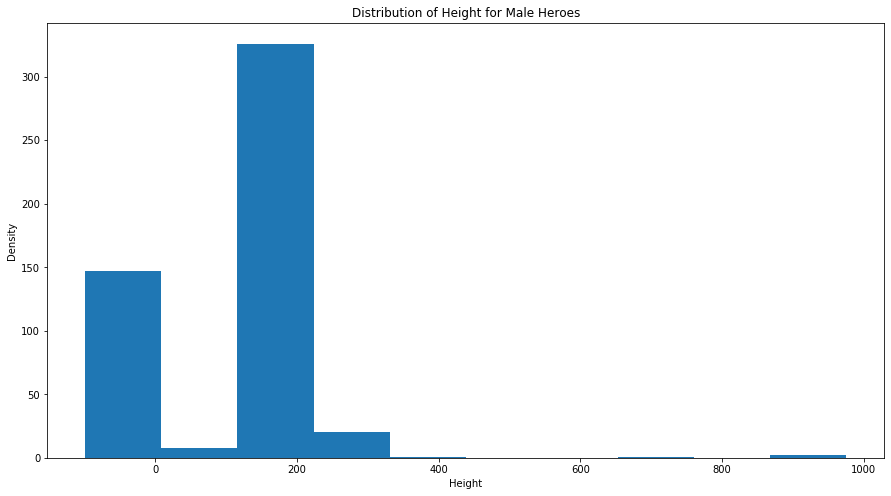

Mean of the 


In [151]:
# Male Height
show_distplot(male_heroes_df, 'Male', 'Height')
print('Mean of the ')

Mean Weight of Male heroes: 52.03535681436996
Median Weight of Male heroes: 79.0
Mode Weight of Male heroes: 0   -99.0
dtype: float64


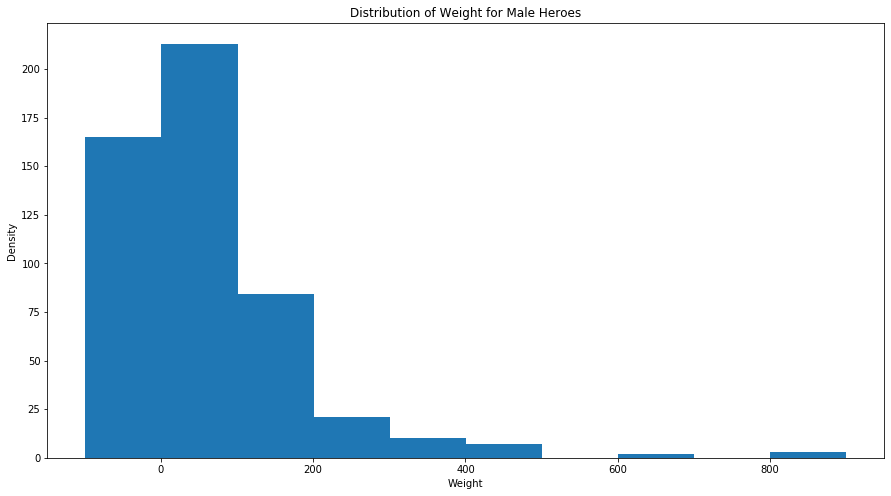

In [152]:
# Male Weight
show_distplot(male_heroes_df, 'Male', 'Weight')

Mean Height of Female heroes: 98.0525
Median Height of Female heroes: 168.0
Mode Height of Female heroes: 0   -99.0
dtype: float64


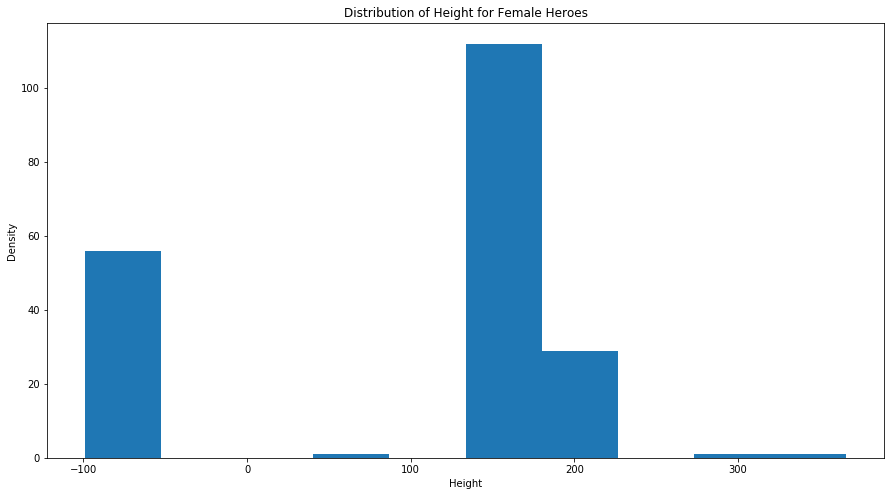

In [153]:
# Female Height
show_distplot(female_heroes_df, 'Female', 'Height')

Mean Weight of Female heroes: 27.265
Median Weight of Female heroes: 54.0
Mode Weight of Female heroes: 0   -99.0
dtype: float64


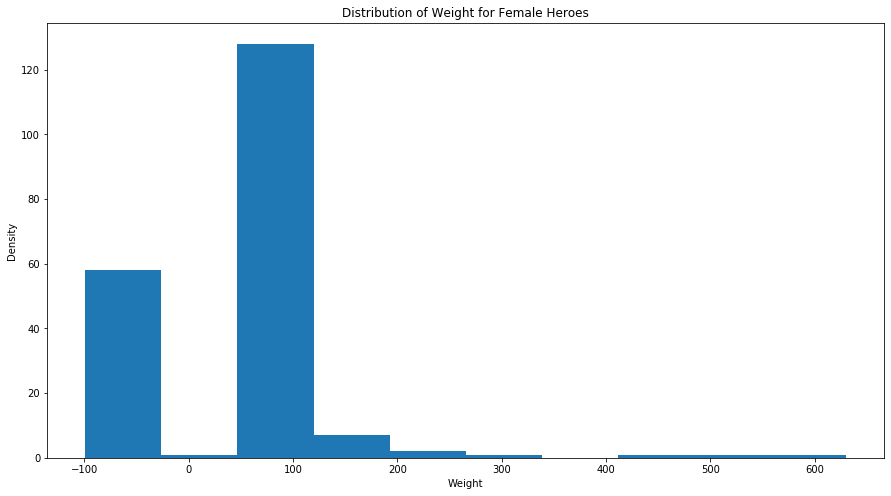

In [154]:
# Female Weight
show_distplot(female_heroes_df, 'Female', 'Weight')
print()

Discuss your findings from the plots above, with respect to the distribution of height and weight by gender.  Your explanation should include a discussion of any relevant summary statistics, including mean, median, mode, and the overall shape of each distribution.  

Write your answer below this line:
____________________________________________________________________________________________________________________________



Mean Height of Male heroes: 191.97486033519553
Median Height of Male heroes: 185.0
Mode Height of Male heroes: 0    183.0
dtype: float64


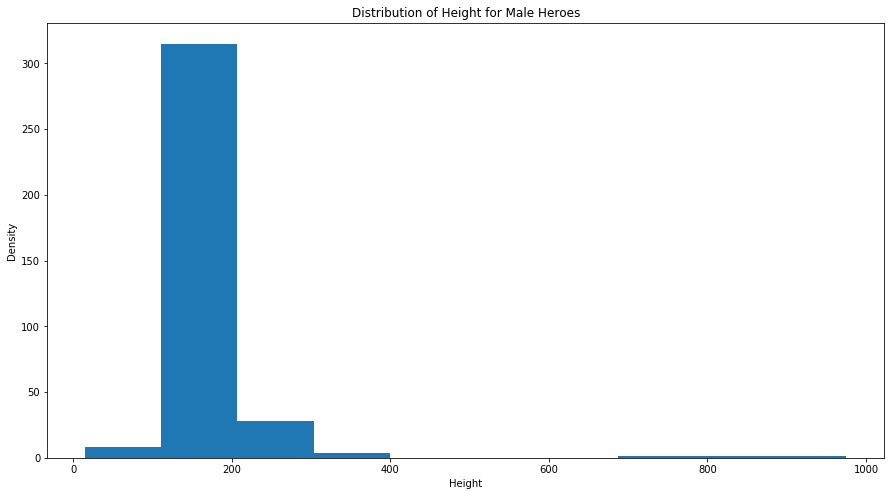

Mean Height for Male heroes: 191.97486033519553
Median Height for Male heroes: 185.0
Mean Height of Female heroes: 174.68402777777777
Median Height of Female heroes: 170.0
Mode Height of Female heroes: 0    168.0
dtype: float64


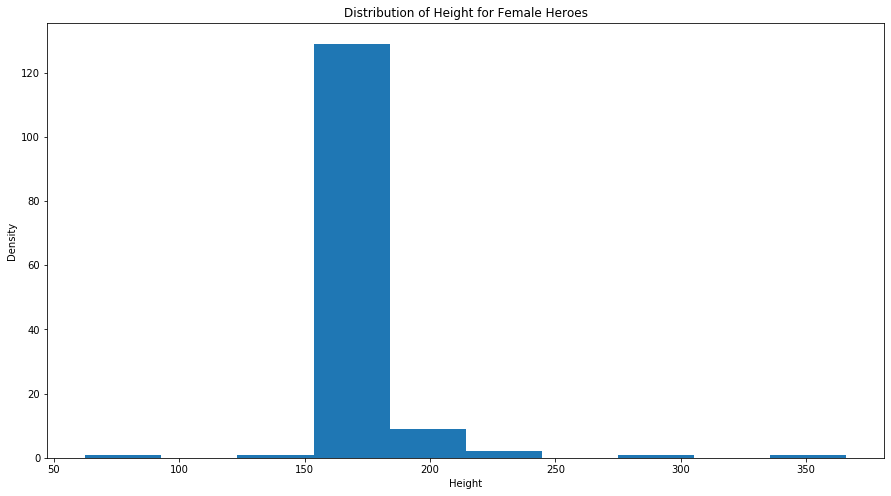

Mean Height for Female heroes: 174.68402777777777
Median Height for Female heroes: 170.0
Mean Weight of Male heroes: 125.33192703310831
Median Weight of Male heroes: 90.0
Mode Weight of Male heroes: 0    79.0
dtype: float64


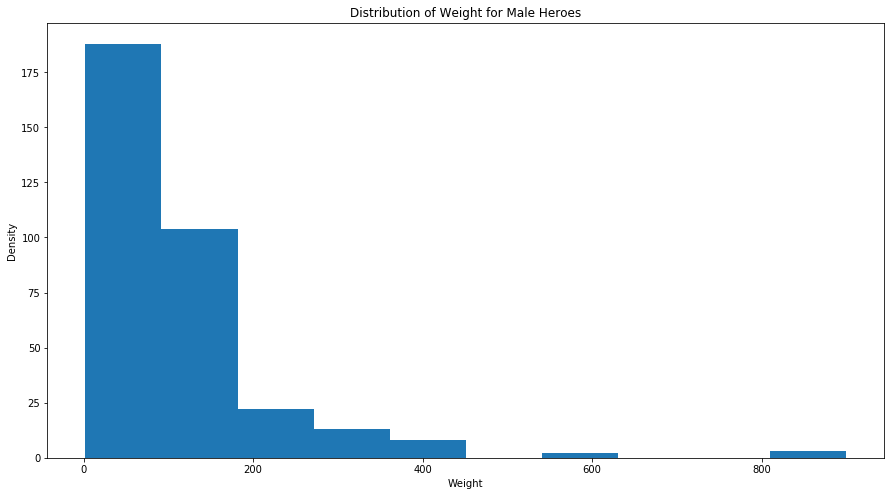

Mean Weight for Male heroes: 125.33192703310831
Median Weight for Male heroes: 90.0
Mean Weight of Female heroes: 78.83802816901408
Median Weight of Female heroes: 58.0
Mode Weight of Female heroes: 0    54.0
dtype: float64


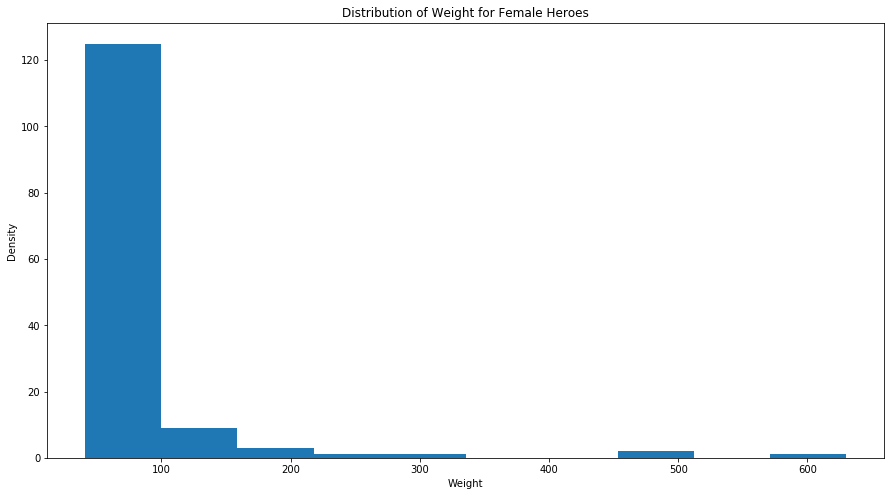

Mean Weight for Female heroes: 78.83802816901408
Median Weight for Female heroes: 58.0


In [155]:
for feat in ['Height', 'Weight']:
    df = new_heroes_df[new_heroes_df[feat]>0] #Temporarily remove negatives
    for group in ['Male', 'Female']:
        show_distplot(df[df['Gender']==group], group, feat)
        print('Mean {} for {} heroes: {}'.format(feat, group, df[df['Gender']==group][feat].mean()))
        print('Median {} for {} heroes: {}'.format(feat, group, df[df['Gender']==group][feat].median()))

### Sample Question: Most Common Powers

The rest of this notebook will be left to you to investigate the dataset by formulating your own questions, and then seeking answers using pandas and numpy.  Every answer should include some sort of visualization, when appropriate. Before moving on to formulating your own questions, use the dataset to answer the following questions about superhero powers:

* What are the 5 most common powers overall?
* What are the 5 most common powers in the Marvel Universe?
* What are the 5 most common powers in the DC Universe?

In [156]:
def top_5_powers(dataframe):
    df = dataframe.drop(heroes_df.columns.values[1:], axis=1)
    columns = df.columns.values
    for col in columns:
        df[col] = df[col].map({'True': 1, 'False': 0})
        
    power_counts_dict = dict(df.sum())
    
    return sorted(power_counts_dict.items(), key=lambda x: x[1], reverse=True)[:5] 
    
overall_top_5 = top_5_powers(combined_df)
marvel_df = combined_df[combined_df['Publisher'] == 'Marvel Comics']
dc_df = combined_df[combined_df['Publisher'] == 'DC Comics']
print(overall_top_5)

[('Super Strength', 340), ('Stamina', 279), ('Durability', 245), ('Super Speed', 236), ('Agility', 231)]


In [157]:
marvel_top_5 = top_5_powers(marvel_df)
print(marvel_top_5)

[('Super Strength', 192), ('Stamina', 144), ('Durability', 143), ('Super Speed', 128), ('Agility', 118)]


In [158]:
dc_top_5 = top_5_powers(dc_df)
print(dc_top_5)

[('Super Strength', 102), ('Stamina', 83), ('Flight', 82), ('Super Speed', 75), ('Agility', 68)]


<Figure size 432x288 with 0 Axes>

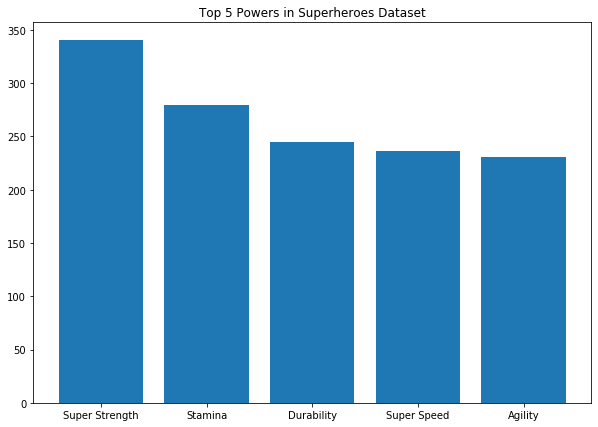

None

<Figure size 432x288 with 0 Axes>

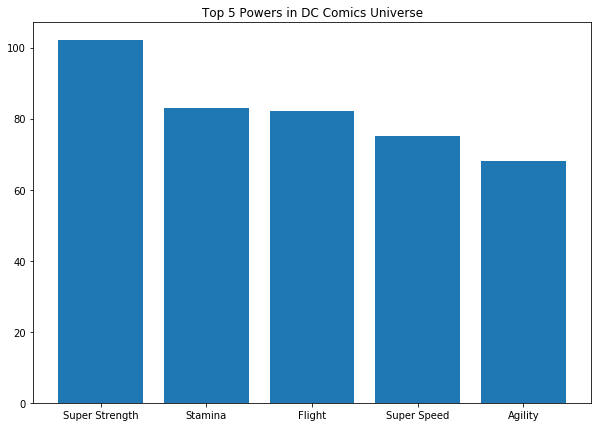

None

<Figure size 432x288 with 0 Axes>

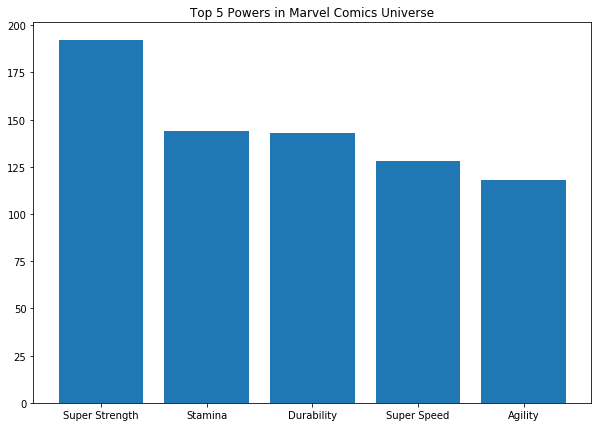

In [159]:
def top_5_bar_chart(top_5_list, publisher=None):
    marvel_powers = [i[0] for i in top_5_list]
    marvel_values = [i[1] for i in top_5_list]

    plt.clf()
    plt.figure(figsize=(10, 7))
    bar_positions = np.arange(len(marvel_powers))
    plt.bar(bar_positions, marvel_values)
    plt.xticks(bar_positions, marvel_powers)
    if publisher:
        plt.title('Top 5 Powers in {} Universe'.format(publisher))
    else:
        plt.title('Top 5 Powers in Superheroes Dataset')
    plt.show()

display(top_5_bar_chart(overall_top_5))
display(top_5_bar_chart(dc_top_5, publisher='DC Comics'))
top_5_bar_chart(marvel_top_5, publisher='Marvel Comics')

Analyze the results you found above to answer the following question:

How do the top 5 powers in the Marvel and DC universes compare?  Are they similar, or are there significant differences? How do they compare to the overall trends in the entire Superheroes dataset?

Write your answer below this line:
____________________________________________________________________________________________________________________________


### Your Own Investigation

For the remainder of this lab, you'll be focusing on coming up with and answering your own question, just like we did above.  Your question should not be overly simple, and should require both descriptive statistics and data visualization to answer.  In case you're unsure of what questions to ask, some sample questions have been provided below.

Pick one of the following questions to investigate and answer, or come up with one of your own!

* Which powers have the highest chance of co-occurring in a hero (e.g. super strength and flight), and does this differ by gender?
* Is there a relationship between a hero's height and weight and their powerset?
* What is the distribution of skin colors amongst alien heroes?

Explain your question below this line:
____________________________________________________________________________________________________________________________



Some sample cells have been provided to give you room to work. If you need to create more cells, you can do this easily by:

1. Highlighting a cell and then pressing `esc` to enter command mode.
1. Pressing `b` to add a cell below the currently highlighted cell, or `a` to add one above it.  

Be sure to include thoughtful, well-labeled visualizations to back up your analysis!

Which powers have the highest chance of co-occurring in a hero (e.g. super strength and flight), and does this differ by gender?

In [160]:
combined_df.columns

Index(['Gender', 'Publisher', 'Alignment', 'Agility', 'Accelerated Healing',
       'Lantern Power Ring', 'Dimensional Awareness', 'Cold Resistance',
       'Durability', 'Stealth',
       ...
       'Web Creation', 'Reality Warping', 'Odin Force', 'Symbiote Costume',
       'Speed Force', 'Phoenix Force', 'Molecular Dissipation',
       'Vision - Cryo', 'Omnipresent', 'Omniscient'],
      dtype='object', length=170)

## Summary

In this lab, we demonstrated our mastery of:
* Using all of our Pandas knowledge to date to clean the dataset and deal with null values
* Using Queries and aggregations to group the data into interesting subsets as needed
* Using descriptive statistics and data visualization to find answers to questions we may have about the data